In [1]:
import pandas as pd
import xgboost as xbg
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')

In [43]:
def analyse(estimator, X_test, y_test):
    import math
    from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

    # Valeurs réelle des données de test
    y_real_test = np.exp(y_test)
    # Prédiction sur les données de test
    y_pred_test = np.exp(estimator.predict(X_test))

    # y_real_test = y_test
    # y_pred_test = estimator.predict(X_test)


    # Calcul du coefficient de détermination (R²)
    r2 = np.round(r2_score(y_real_test, y_pred_test), 2)
    print("R² :", r2)

    # Calcul de l'erreur absolue moyenne (MAE)
    mae = np.round(mean_absolute_error(y_real_test, y_pred_test), 0)
    print("MAE :", mae)

    # Calcul de le pourcentage d'erreur absolue (MAPE)
    mape = np.round(100 * mean_absolute_percentage_error(y_real_test, y_pred_test), 1)
    print("MAPE :", mape, "%")

    # Calcul de l'erreur quadratique moyenne (RMSE)
    rmse = np.round(math.sqrt(mean_squared_error(y_real_test, y_pred_test)), 0)
    print("RMSE :", rmse)

    # Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
    predictions_within_range = np.round(((y_pred_test >= 0.90 * y_real_test) & (y_pred_test <= 1.10 * y_real_test)).mean() * 100, 1)
    print("Taux de prédictions entre 90% et 110% :", predictions_within_range, "%")

    # Calcul de l'écart total
    total_error_rate = np.round(100 * (y_pred_test.sum() - y_real_test.sum()) / y_real_test.sum(), 1)
    print("Ecart total sur l'ensemble des bâtiments : ", total_error_rate, "%")



In [7]:
data = pd.read_csv('data/polars_data_cleaned.csv')
# Formule pour les poucentages
# data["Electricity(percent)"] = data["Electricity(kBtu)"] / data["SiteEnergyUse(kBtu)"]
data


,DataYear,BuildingType,PrimaryPropertyType,ZipCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,...,NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,BuildingsAge,PropertyGFABuildings(percent),PropertyGFAParking(percent),SteamUse(percent),Electricity(percent),NaturalGas(percent)
0,2016,NonResidential,Hotel,98101,DOWNTOWN,47.61220,-122.33799,1927,1,12,...,12764.529,1276453.0,249.98,2.83,89,1.000000,0.000000,0.277302,0.546060,0.176638
1,2016,NonResidential,Hotel,98101,DOWNTOWN,47.61317,-122.33393,1996,1,11,...,51450.816,5145082.0,295.86,2.86,20,0.854547,0.145453,0.000000,0.386609,0.613391
2,2016,NonResidential,Hotel,98101,DOWNTOWN,47.61412,-122.33664,1926,1,10,...,18112.130,1811213.0,286.43,4.67,90,1.000000,0.000000,0.325913,0.407519,0.266567
3,2016,NonResidential,Hotel,98121,DOWNTOWN,47.61375,-122.34047,1980,1,18,...,88039.984,8803998.0,505.01,2.88,36,0.646885,0.353115,0.000000,0.378802,0.621198
4,2016,Nonresidential COS,Other,98101,DOWNTOWN,47.61623,-122.33657,1999,1,2,...,47151.816,4715182.0,301.81,3.10,17,0.617651,0.382349,0.000000,0.609884,0.390116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,2016,NonResidential,Warehouse,98108,GREATER DUWAMISH,47.54425,-122.31776,1955,1,1,...,28730.520,2873052.0,157.70,3.03,61,0.918940,0.081060,0.000000,0.203226,0.796774
1354,2016,NonResidential,Small- and Mid-Sized Office,98108,GREATER DUWAMISH,47.53161,-122.29944,1929,1,2,...,22536.210,2253621.0,134.80,5.39,87,1.000000,0.000000,0.000000,0.490206,0.509794
1355,2016,NonResidential,Other,98155,NORTHEAST,47.68109,-122.26180,2013,1,1,...,10241.600,1024160.0,67.65,0.94,3,1.000000,0.000000,0.000000,0.649953,0.350047
1356,2016,NonResidential,K-12 School,98144,GREATER DUWAMISH,47.58831,-122.30650,2015,1,3,...,0.000,0.0,9.24,0.21,1,1.000000,0.000000,0.000000,1.000000,0.000000


In [16]:
data.describe()

,ZipCode,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,...,NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,BuildingsAge,SteamUse(percent),Electricity(percent),NaturalGas(percent),BuildingsGroundGFA,SiteEnergyUse(kBtu)Log,TotalGHGEmissionsLog
count,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,...,1.358000e+03,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000
mean,98116.803387,47.615573,-122.333191,1.048601,3.630339,9767.541973,72693.756259,66718.794551,12658.420692,1663.835199,...,1.082220e+06,95.386384,1.384470,55.878498,0.021522,0.709375,0.267481,28116.260780,14.775591,3.778580
std,18.373399,0.047449,0.022996,0.399698,4.787945,29081.136625,78888.374882,72631.357814,26818.241287,5589.970917,...,1.794520e+06,136.606615,1.603237,32.609873,0.092515,0.262199,0.262171,34708.154832,1.089243,1.328062
min,98006.000000,47.509590,-122.411820,1.000000,1.000000,0.000000,17956.000000,8223.000000,0.000000,0.000000,...,0.000000e+00,0.750000,0.030000,1.000000,0.000000,0.084121,0.000000,221.696970,11.579819,-0.287682
25%,98104.250000,47.584897,-122.342658,1.000000,1.000000,0.000000,27847.500000,24992.500000,0.000000,0.000000,...,0.000000e+00,18.912500,0.340000,30.000000,0.000000,0.495880,0.000000,11646.434524,14.005423,2.939816
50%,98109.000000,47.612330,-122.332820,1.000000,2.000000,0.000000,43855.000000,40120.500000,0.000000,0.000000,...,3.986660e+05,45.095000,0.805000,52.000000,0.000000,0.725220,0.221134,19515.375000,14.714216,3.808768
75%,98125.000000,47.649103,-122.322490,1.000000,4.000000,0.000000,83779.500000,78440.750000,12619.000000,0.000000,...,1.234032e+06,111.097500,1.820000,87.000000,0.000000,0.999999,0.484698,30849.500000,15.549306,4.710407
max,98199.000000,47.733870,-122.261800,8.000000,99.000000,206597.000000,706176.000000,564258.000000,197750.000000,84051.900000,...,1.262546e+07,1280.810000,14.940000,116.000000,0.766987,1.000004,0.915879,530039.000000,17.427030,7.155249


## Analyse Energy Star Score

In [5]:
# Analyse

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

encoder = LabelEncoder()
scaler = StandardScaler()

y = np.log(data["SiteEnergyUse(kBtu)"])
# y = np.log(data["SiteEnergyUse(kBtu)"])
# Dans le futur, il faudra se passer des relévés annuels
X = data.copy().drop([
        'ENERGYSTARScore', 
        'SiteEUI(kBtu/sf)', 
        'SiteEUIWN(kBtu/sf)', 
        'SourceEUI(kBtu/sf)', 
        'SourceEUIWN(kBtu/sf)', 
        'SiteEnergyUse(kBtu)', 
        'SiteEnergyUseWN(kBtu)', 
        'SteamUse(kBtu)', 
        'Electricity(kWh)', 
        'Electricity(kBtu)', 
        'NaturalGas(therms)', 
        'NaturalGas(kBtu)', 
        'TotalGHGEmissions', 
        'GHGEmissionsIntensity'
    ], axis=1)

categorical_columns = X.select_dtypes(['category', 'object']).columns
numerical_columns = X.select_dtypes(
    ['int8', 'int16', 'int32', 'int64', 'float32', 'float64']).columns

X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
for column in categorical_columns:
    X[column] = encoder.fit_transform(X[column])

X

# from sklearn.preprocessing import OneHotEncoder, StandardScaler

# encoder = OneHotEncoder(sparse_output=False)
# scaler = StandardScaler()

# y = data["SiteEnergyUse(kBtu)Log"]
# # y = data["SiteEnergyUse(kBtu)"]
# X = data.copy().drop(["SiteEnergyUse(kBtu)", "SiteEnergyUse(kBtu)Log",
#                       "SiteEUI(kBtu/sf)", 
#                       # Dans le futur, il faudra se passer des relévés annuels
#                       "ENERGYSTARScore",
#                       "SteamUse(kBtu)", "NaturalGas(kBtu)", 
#                       "TotalGHGEmissions", "TotalGHGEmissionsLog"], axis=1)

# categorical_columns = X.select_dtypes(['category', 'object']).columns
# numerical_columns = X.select_dtypes(
#     ['int8', 'int16', 'int32', 'int64', 'float32', 'float64']).columns

# encoder = OneHotEncoder(sparse=False)
# scaler = StandardScaler()

# X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
# encoder.fit_transform(X[categorical_columns])

# X = pd.merge(X[numerical_columns],
#              pd.DataFrame(columns=encoder.get_feature_names_out().tolist(),
#                           data=encoder.fit_transform(X[categorical_columns])),
#              left_index=True, right_index=True)

# X


,DataYear,BuildingType,PrimaryPropertyType,ZipCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,...,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,BuildingsAge,PropertyGFABuildings(percent),PropertyGFAParking(percent),SteamUse(percent),Electricity(percent),NaturalGas(percent)
0,0.0,0,2,-0.860440,3,-0.071113,-0.208755,-1.016064,-0.121639,1.748714,...,21,-0.472182,13,-0.297756,1.016064,0.446758,-0.446758,2.765749,-0.623095,-0.346630
1,0.0,0,2,-0.860440,3,-0.050662,-0.032136,1.100640,-0.121639,1.539779,...,32,0.089732,27,0.529386,-1.100640,-0.630762,0.630762,-0.232712,-1.231447,1.319893
2,0.0,0,2,-0.860440,3,-0.030634,-0.150027,-1.046740,-0.121639,1.330844,...,21,-0.472182,13,-0.297756,1.046740,0.446758,-0.446758,3.291388,-1.151669,-0.003487
3,0.0,0,2,0.228491,3,-0.038434,-0.316641,0.609810,-0.121639,3.002323,...,32,2.064676,33,-0.297756,-0.609810,-2.169129,2.169129,-0.232712,-1.261235,1.349683
4,0.0,1,9,-0.860440,3,0.013851,-0.146982,1.192670,-0.121639,-0.340635,...,21,-0.472182,13,-0.297756,-1.192670,-2.385694,2.385694,-0.232712,-0.379587,0.467940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,0.0,0,19,-0.479314,5,-1.503696,0.671295,-0.157112,-0.121639,-0.549569,...,21,-0.472182,13,-0.297756,0.157112,-0.153735,0.153735,-0.232712,-1.931109,2.019630
1354,0.0,0,16,-0.479314,5,-1.770184,1.468257,-0.954710,-0.121639,-0.340635,...,21,-0.472182,13,-0.297756,0.954710,0.446758,-0.446758,-0.232712,-0.836194,0.924597
1355,0.0,0,9,2.079674,9,1.381289,3.105682,1.622146,-0.121639,-0.549569,...,21,-0.472182,13,-0.297756,-1.622146,0.446758,-0.446758,-0.232712,-0.226711,0.315047
1356,0.0,0,3,1.480762,5,-0.574783,1.161131,1.683500,-0.121639,-0.131700,...,32,-0.472182,13,-0.297756,-1.683500,0.446758,-0.446758,-0.232712,1.108823,-1.020631


In [9]:
from sklearn.model_selection import train_test_split

# Division des données en ensembles d'entraînement et de test
# avec 80% des données pour l'ensemble d'entraînement et 20% pour l'ensemble de test
# Les variables explicatives sont stockées dans X et la variable cible est y['Log2-SiteEnergyUseWN(kBtu)']
# random_state est utilisé pour garantir la reproductibilité des résultats
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

### Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

parameters = {
    # nombre d'arbres de décision
    # 'n_estimators': [10, 50, 100, 300, 500, 1000, 2000],
    # 'n_estimators': [500, 1000, 2000],
    'n_estimators': [500],
    # nombre de feuilles minimales dans un noeud
    # 'min_samples_leaf': [1, 3, 5, 10, 15, 20],
    'min_samples_leaf': [1],
    # nombre de features observées pour chaque arbre
    'max_depth': [20],
    'max_features': ['sqrt']
}

rfr_search = GridSearchCV(RandomForestRegressor(), param_grid=parameters, verbose=2, cv=5)
rfr_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, n_estimators=500; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, n_estimators=500; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, n_estimators=500; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, n_estimators=500; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, n_estimators=500; total time=   0.7s


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [20], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1], 'n_estimators': [500]},
             verbose=2)

In [40]:

analyse(rfr_search, X_test, y_test)
rfr_search.best_params_

R² : 0.68
MAE : 1741845.0
MAPE : 0.6 %
RMSE : 2888391.0
MPSE : 64.5 %
Taux de prédictions entre 90% et 110% : 15.4 %
Ecart total sur l'ensemble des bâtiments :  -11.3 %


{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 500}

### XG Boost

In [24]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

parameters = {
    # 'n_estimators': [100, 500, 1000, 2000]
    'n_estimators': [100]
}
xgb_grid = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid=parameters,
                        # scoring = 'neg_mean_squared_error',
                        cv=5,
                        verbose=5)
xgb_grid.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..................n_estimators=100;, score=0.738 total time=   0.2s
[CV 2/5] END ..................n_estimators=100;, score=0.677 total time=   0.1s
[CV 3/5] END ..................n_estimators=100;, score=0.605 total time=   0.1s
[CV 4/5] END ..................n_estimators=100;, score=0.711 total time=   0.1s
[CV 5/5] END ..................n_estimators=100;, score=0.638 total time=   0.1s
[CV 1/5] END ..................n_estimators=500;, score=0.735 total time=   0.5s
[CV 2/5] END ..................n_estimators=500;, score=0.678 total time=   0.4s
[CV 3/5] END ..................n_estimators=500;, score=0.602 total time=   0.5s
[CV 4/5] END ..................n_estimators=500;, score=0.709 total time=   0.4s
[CV 5/5] END ..................n_estimators=500;, score=0.636 total time=   0.5s
[CV 1/5] END .................n_estimators=1000;, score=0.735 total time=   0.6s
[CV 2/5] END .................n_estimators=1000;,

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=-1, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'n_estimators': [100, 500, 1000, 2000]}, verbose=5)

In [45]:
# xgb_grid.fit(X_train, y_train)

analyse(xgb_grid, X_test, y_test)
xgb_grid.best_params_


R² : 0.64
MAE : 1776844.0
MAPE : 60.7 %
RMSE : 3051776.0
Taux de prédictions entre 90% et 110% : 16.9 %
Ecart total sur l'ensemble des bâtiments :  -3.8 %


{'n_estimators': 100}

### Support Vector Machine

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# parameters = {'gamma': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],  # kernel coefficient [ici kernel = Radial Basis Function]
#               # erreur tolérée par l'algorithme
#               'epsilon': [0.001, 0.01, 0.1, 1],
#               'C': [0.001, 0.01, 0.1, 1, 10]}  # parametre de régularisation
parameters = {'gamma': [0.001],  
                # kernel coefficient [ici kernel = Radial Basis Function]
                # erreur tolérée par l'algorithme
              'epsilon': [0.1],
              'C': [10]}  # parametre de régularisation

svm = GridSearchCV(estimator=SVR(),
                   param_grid=parameters,
                   # scoring = 'neg_mean_squared_error',
                   cv=5,
                   verbose=2
                   )

svm.fit(X_train, y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .....................C=10, epsilon=0.1, gamma=0.001; total time=   0.0s
[CV] END .....................C=10, epsilon=0.1, gamma=0.001; total time=   0.0s
[CV] END .....................C=10, epsilon=0.1, gamma=0.001; total time=   0.0s
[CV] END .....................C=10, epsilon=0.1, gamma=0.001; total time=   0.0s
[CV] END .....................C=10, epsilon=0.1, gamma=0.001; total time=   0.0s


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [10], 'epsilon': [0.1], 'gamma': [0.001]},
             verbose=2)

In [42]:
analyse(svm, X_test, y_test)
svm.best_params_

R² : 0.38
MAE : 2143855.0
MAPE : 0.8 %
RMSE : 3985594.0
MPSE : 89.0 % =>  4478002.10625 15884960049784.729
Taux de prédictions entre 90% et 110% : 13.2 %
Ecart total sur l'ensemble des bâtiments :  -8.4 %


{'C': 10, 'epsilon': 0.1, 'gamma': 0.001}

In [50]:
y_real_pred = np.exp(xgb_grid.predict(X_test))
y_real_test = np.exp(y_test)
df_res=pd.DataFrame({"True values": y_real_test,"Predictions":y_real_pred})
df_res["Error"]=abs(df_res["True values"]-df_res["Predictions"])/df_res["True values"]*100
df_res.head()
def color_to_use(num):
    if np.isinf(num):
        return "#cc2900"
    elif num> 80:
        return "#cc2900"
    elif num >50:
        return "#dfa61f"
    elif num>30:
        return "#dddf1f"
    elif num>10:
        return "#7cce2e"
    else:
        return "#13a90d"
df_res["color to use"]=df_res["Error"].apply(color_to_use)
df_res.head()

,True values,Predictions,Error,color to use
51,1049748.6,5.575984e+06,431.173321,#cc2900
1099,9512829.0,1.151160e+07,21.011268,#7cce2e
1311,6275367.5,1.104777e+07,76.049753,#dfa61f
514,859236.6,3.171708e+06,269.130982,#cc2900
926,659761.9,3.675282e+05,44.293819,#dddf1f


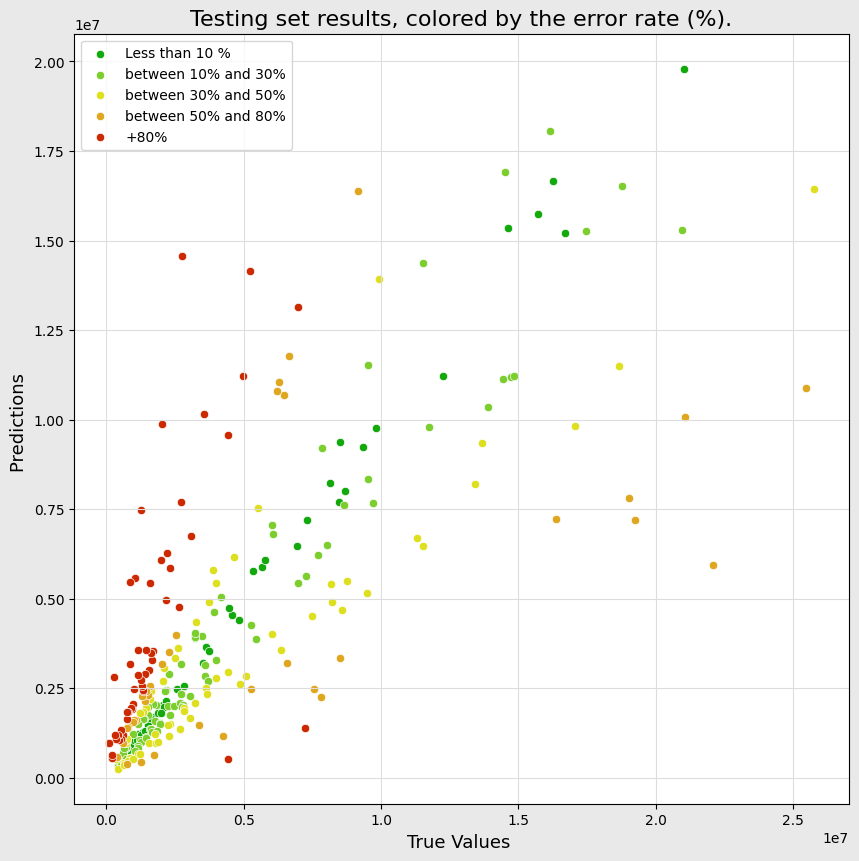

In [51]:
df_res=df_res.sort_values(by = "Error")
dict_lab={"#cc2900":'+80%','#dfa61f':"between 50% and 80%"
          ,'#dddf1f':"between 30% and 50%"
          ,'#7cce2e':"between 10% and 30%"
          ,'#13a90d':"Less than 10 %"}
fig=plt.figure(figsize=[10,10])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Testing set results, colored by the error rate (%).",size=16)
for c in df_res["color to use"].unique():
    d=df_res.loc[df_res["color to use"]==c]
    sns.scatterplot(data=d,x="True values",y="Predictions",color=c,label=dict_lab[c])

plt.xlabel('True Values ',size=13)
plt.ylabel('Predictions ',size=13)
plt.grid(color='#dddddd')

### Partial data test

## Previous tests

In [41]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# Instanciation de l'encodeur OneHotEncoder
ore = OrdinalEncoder()

# Instanciation du StandardScaler
ss = StandardScaler()

y = data.copy()['TotalGHGEmissions']
X = data.copy() \
    .drop(['TotalGHGEmissions', 'SiteEnergyUse(kBtu)'], axis=1)
    # .drop(['SiteEUI(kBtu/sf)',
    #        'SiteEUIWN(kBtu/sf)',
    #        'SourceEUI(kBtu/sf)',
    #        'SourceEUIWN(kBtu/sf)',
    #        'SiteEnergyUse(kBtu)',
    #        'SiteEnergyUseWN(kBtu)',
    #        'SteamUse(kBtu)',
    #        'Electricity(kWh)',
    #        'Electricity(kBtu)',
    #        'NaturalGas(therms)',
    #        'NaturalGas(kBtu)',
    #        'TotalGHGEmissions',
    #        'GHGEmissionsIntensity',
    #     #    "PropertyGFATotal",
    #     #    "PropertyGFAParking",
    #     #    "PropertyGFABuilding(s)",
    #     #    "LargestPropertyUseTypeGFA",
    #     #    "SecondLargestPropertyUseTypeGFA",
    #     #    "ThirdLargestPropertyUseTypeGFA",
    #        "PropertyGFATotalLog",
    #        "PropertyGFAParkingLog",
    #        "PropertyGFABuildingLog",
    #        "LargestPropertyUseTypeGFALog",
    #        "SecondLargestPropertyUseTypeGFALog",
    #        "ThirdLargestPropertyUseTypeGFALog",
    #        'SiteEnergyUseWNLog',
    #        'TotalGHGEmissionsLog'], axis=1)

numerical_columns = X.select_dtypes(
    ['int8', 'int64', 'int32', 'float32', 'float64']).columns
categorical_columns = X.select_dtypes(['category', 'object']).columns

ore.fit(X[categorical_columns])

# Standardisation des colonnes numériques dans X à l'aide de StandardScaler
# X[numerical_columns] = ss.fit_transform(X[numerical_columns])
X[categorical_columns] = ore.transform(X[categorical_columns])


In [31]:
X = pd.concat([X, X], axis=0)
y = pd.concat([y, y], axis=0)
X.describe()

,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,TaxParcelIdentificationNumber,Neighborhood,Latitude,Longitude,...,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
count,3076.000000,3076.000000,3076.000000,3076.000000,3076.0,3076.0,3076.000000,3076.000000,3076.000000,3076.000000,...,3.076000e+03,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000
mean,0.056567,12.023407,766.211964,756.173602,0.0,0.0,727.115085,8.884265,47.616166,-122.333352,...,9.938213e+04,10840.743823,86416.111183,223.182705,26.674902,79476.908973,25.953836,15859.260273,16.403121,1931.428153
std,0.233849,6.274851,443.119746,436.595973,0.0,0.0,422.689031,3.706588,0.046860,0.023190,...,1.398686e+05,31552.540892,118415.259537,94.267303,12.841940,108048.063377,7.437708,36947.079168,5.040458,6156.550745
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,47.509590,-122.411820,...,2.000000e+04,0.000000,16300.000000,0.000000,0.000000,9000.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,382.000000,380.000000,0.0,0.0,360.000000,6.000000,47.587670,-122.342740,...,2.892300e+04,0.000000,28109.000000,159.000000,22.000000,25184.000000,22.000000,0.000000,15.000000,0.000000
50%,0.000000,12.000000,765.500000,754.500000,0.0,0.0,730.500000,9.000000,47.612480,-122.333135,...,4.598550e+04,0.000000,44289.000000,232.000000,23.000000,40498.500000,22.000000,0.000000,15.000000,0.000000
75%,0.000000,17.000000,1150.000000,1132.000000,0.0,0.0,1094.000000,11.000000,47.648680,-122.322490,...,9.976500e+04,0.000000,89550.000000,293.000000,30.000000,85339.000000,33.000000,13000.000000,15.000000,0.000000
max,2.000000,21.000000,1534.000000,1516.000000,0.0,0.0,1459.000000,18.000000,47.733870,-122.261800,...,1.158691e+06,205076.000000,962428.000000,361.000000,54.000000,914832.000000,47.000000,296815.000000,38.000000,58152.000000


In [42]:
X['PrimaryPropertyType'].unique()

array([ 2., 10.,  8., 19., 17., 15., 20.,  3.,  5., 16.,  7., 14.,  1.,
       12.,  0., 21., 18.,  4., 11., 13.,  6.,  9.])

In [43]:
from sklearn.model_selection import train_test_split

# Division des données en ensembles d'entraînement et de test
# avec 80% des données pour l'ensemble d'entraînement et 20% pour l'ensemble de test
# Les variables explicatives sont stockées dans X et la variable cible est y['Log2-SiteEnergyUseWN(kBtu)']
# random_state est utilisé pour garantir la reproductibilité des résultats
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)


In [275]:
from sklearn.ensemble import RandomForestRegressor

parameters = {
    'n_estimators': [10, 50, 100, 300, 500],  # nombre d'arbres de décision
    # nombre de feuilles minimales dans un noeud
    'min_samples_leaf': [1, 3, 5, 10],
    # nombre de features observées pour chaque arbre
    'max_features': ['auto', 'sqrt']
}

# rfr_search = GridSearchCV(RandomForestRegressor(), param_grid=parameters, verbose=2, cv=5)
# rfr_search.fit(X_train, y_train)

In [276]:
# analyse(rfr_search, X_test, y_test)

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

parameters = {'gamma': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],  # kernel coefficient [ici kernel = Radial Basis Function]
              # erreur tolérée par l'algorithme
              'epsilon': [0.001, 0.01, 0.1, 1],
              'C': [0.001, 0.01, 0.1, 1, 10]}  # parametre de régularisation

grid_search = GridSearchCV(estimator=SVR(),
                   param_grid=parameters,
                   # scoring = 'neg_mean_squared_error',
                   cv=5,
                   verbose=2
                   )

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_params


Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-06; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.00

{'C': 10, 'epsilon': 0.1, 'gamma': 0.001}

In [38]:
from sklearn.svm import SVR

svm = SVR(C=10, gamma=1e-08, epsilon=1)
svm.fit(X_train, y_train)
analyse(svm, X_test, y_test)


R² : -0.0005741243074590674
MAE : 115.63558338651067
RMSE : 352.0985549189518
MPSE : 238.07053626073812
Taux de prédictions entre 90% et 110% : 7.467532467532467


In [279]:
from sklearn.svm import SVR
from sklearn.model_selection import ShuffleSplit

parameters = {'gamma': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],  # kernel coefficient [ici kernel = Radial Basis Function]
              # erreur tolérée par l'algorithme
              'epsilon': [0.001, 0.01, 0.1, 1],
              'C': [0.001, 0.01, 0.1, 1, 10]}  # parametre de régularisation

svm = GridSearchCV(estimator=SVR(),
                   param_grid=parameters,
                   # scoring = 'neg_mean_squared_error',
                   cv=5,
                   verbose=2
                   )

sss = ShuffleSplit(n_splits=2, test_size=0.2, random_state=42)
sss.get_n_splits(X, y)

for i, (train_index, test_index) in enumerate(sss.split(X, y)):
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")


  Train: index=[ 862  534 1646 ...  860 1459 1126]
  Test:  index=[1611 1403  974 1055  307  432 1464  598 1087  305  367 1609 1512 1480
 1107 1355   69 1605  438  135  555   99 1054 1418  736  993  247  351
 1293   56 1798 1603 1251 1630 1283 1027  111 1526  767 1216 1803 1341
   70 1053  900  892 1536 1206 1765 1492 1298  680 1234 1121  210  485
  411  609  526 1375 1933 1604 1801 1405  707  552  344 1329 1125 1322
 1681  914 1886  120 1236  936 1770 1540  239  746 1085 1487  630 1237
  843 1420  350  964  705  807  631 1870  999 1080   65 1944 1103 1626
 1383   29 1507  678 1557 1623  813 1866  303 1358  128  352 1235  382
 1395 1221  584  857 1822 1309  480 1874 1882  906 1501 1102 1338  583
 1733 1220 1684  785 1160  486 1432  109  275  394 1036  188 1596  196
  254  297  670 1185  483 1271  694  306  231 1078  289 1771  251  548
 1936 1252  937 1593 1146  233 1665  535 1711  613 1128  879 1381 1273
 1202 1719  679 1393   23  324   63 1043 1709 1089 1105 1402  212  744
 1190  298 

In [280]:
from sklearn.svm import SVR
from sklearn.model_selection import ShuffleSplit

parameters = {'gamma': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],  # kernel coefficient [ici kernel = Radial Basis Function]
              # erreur tolérée par l'algorithme
              'epsilon': [0.001, 0.01, 0.1, 1],
              'C': [0.001, 0.01, 0.1, 1, 10]}  # parametre de régularisation

svm = GridSearchCV(estimator=SVR(),
                   param_grid=parameters,
                   # scoring = 'neg_mean_squared_error',
                   cv=5,
                   verbose=2
                   )

# for i in range(10):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#     svm.fit(X_train, y_train)
#     analyse(svm, X_test, y_test)



In [44]:
from xgboost import XGBRegressor

parameters = {
    'n_estimators': [100, 500, 1000, 2000]
}
xgb_grid = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid=parameters,
                        # scoring = 'neg_mean_squared_error',
                        cv=5,
                        verbose=5)
xgb_grid.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .................n_estimators=100;, score=-0.859 total time=   0.3s
[CV 2/5] END .................n_estimators=100;, score=-1.171 total time=   0.1s
[CV 3/5] END ..................n_estimators=100;, score=0.086 total time=   0.2s
[CV 4/5] END .................n_estimators=100;, score=-0.191 total time=   0.2s
[CV 5/5] END ..................n_estimators=100;, score=0.376 total time=   0.2s
[CV 1/5] END .................n_estimators=500;, score=-0.862 total time=   1.1s
[CV 2/5] END .................n_estimators=500;, score=-1.173 total time=   0.7s
[CV 3/5] END ..................n_estimators=500;, score=0.086 total time=   0.7s
[CV 4/5] END .................n_estimators=500;, score=-0.190 total time=   0.6s
[CV 5/5] END ..................n_estimators=500;, score=0.376 total time=   0.8s
[CV 1/5] END ................n_estimators=1000;, score=-0.862 total time=   1.0s
[CV 2/5] END ................n_estimators=1000;, 

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=-1, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'n_estimators': [100, 500, 1000, 2000]}, verbose=5)

In [45]:
analyse(xgb_grid, X_test, y_test)

R² : 0.198760834200582
MAE : 153.66946446955785
RMSE : 724.8485521617424
MPSE : 365.1735706729327
Taux de prédictions entre 90% et 110% : 8.441558441558442


In [49]:
from xgboost import XGBRegressor

xgb_stable = XGBRegressor(models="hist")
xgb_stable.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[01:37:29] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "models" } are not used.

[0]	validation_0-rmse:810.94071
[1]	validation_0-rmse:790.08308
[2]	validation_0-rmse:778.91901
[3]	validation_0-rmse:772.05359
[4]	validation_0-rmse:756.59650
[5]	validation_0-rmse:746.11613
[6]	validation_0-rmse:743.18437
[7]	validation_0-rmse:742.64180
[8]	validation_0-rmse:741.79567
[9]	validation_0-rmse:734.04926
[10]	validation_0-rmse:733.71254
[11]	validation_0-rmse:732.17223
[12]	validation_0-rmse:731.24985
[13]	validation_0-rmse:730.91639
[14]	validation_0-rmse:731.33528
[15]	validation_0-rmse:731.19198
[16]	validation_0-rmse:731.20869
[17]	validation_0-rmse:729.67013
[18]	validation_0-rmse:730.20547
[19]	validation_0-rmse:730.27686
[20]	validation_0-rmse:730.17105
[21]	validation_0-rmse:727.94663
[22]	validation_0-rmse:726.58509
[23]	validation_0-rmse:726.56743
[24]	validation_0-rmse:726.61610
[25]	v

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, models='hist',
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
xgb_stable.fit(X_train, y_train, eval_set=[(X_test, y_test)])
analyse(xgb_stable, X_test, y_test)

[01:39:58] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "models" } are not used.

[0]	validation_0-rmse:579.46163
[1]	validation_0-rmse:528.52290
[2]	validation_0-rmse:491.65832
[3]	validation_0-rmse:470.06889
[4]	validation_0-rmse:451.48461
[5]	validation_0-rmse:437.23060
[6]	validation_0-rmse:428.24319
[7]	validation_0-rmse:419.18521
[8]	validation_0-rmse:411.98052
[9]	validation_0-rmse:405.22203
[10]	validation_0-rmse:400.35143
[11]	validation_0-rmse:396.23975
[12]	validation_0-rmse:391.11127
[13]	validation_0-rmse:387.81529
[14]	validation_0-rmse:381.77437
[15]	validation_0-rmse:380.34656
[16]	validation_0-rmse:380.20738
[17]	validation_0-rmse:378.01721
[18]	validation_0-rmse:376.93546
[19]	validation_0-rmse:375.33771
[20]	validation_0-rmse:374.68406
[21]	validation_0-rmse:371.18874
[22]	validation_0-rmse:370.41447
[23]	validation_0-rmse:370.34132
[24]	validation_0-rmse:370.61990
[25]	v

In [69]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.datasets import load_diabetes

est = HistGradientBoostingRegressor().fit(X_train, y_train)
# est.score(X_test, y_test)
# est.score(X_train, y_train)
analyse(est, X_test, y_test)


R² : 0.5370913523124093
MAE : 140.35082991690984
RMSE : 410.6471914993114
MPSE : 227.51849799475409
Taux de prédictions entre 90% et 110% : 10.909090909090908


In [306]:
xgb_stable.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [307]:
analyse(xgb_stable, X_test, y_test)

R² : 0.4090907215629237
MAE : 115.32691064790805
RMSE : 409.5920178101102
MPSE : 229.40744862561795
Taux de prédictions entre 90% et 110% : 6.63265306122449
